# Notebook 1: Time Series Analysis with `pandas`
### Rainey Aberle
### Fall 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

qfilename = 'my_streamflow_data.pkl'

In [2]:
# Load streamflow data as a pandas dataframe
df = pd.read_pickle(qfilename)
df

,Dates,WaterYear,Discharge
0,2015-10-01,2016,301.0
1,2015-10-02,2016,314.0
2,2015-10-03,2016,313.0
3,2015-10-04,2016,318.0
4,2015-10-05,2016,313.0
...,...,...,...
1822,2020-09-26,2020,407.0
1823,2020-09-27,2020,417.0
1824,2020-09-28,2020,377.0
1825,2020-09-29,2020,372.0


In [3]:
# View df datatypes
df.dtypes

Dates        datetime64[ns]
WaterYear             int64
Discharge           float64
dtype: object

In [4]:
# Add a column for discharge in m^3/s
df['Discharge_cms'] = df['Discharge'] / (3.2808**3)
# Rename 'Discharge' column to include units
df.rename(columns={'Discharge': 'Discharge_cfs'}, inplace=True)
df

,Dates,WaterYear,Discharge_cfs,Discharge_cms
0,2015-10-01,2016,301.0,8.523682
1,2015-10-02,2016,314.0,8.891814
2,2015-10-03,2016,313.0,8.863496
3,2015-10-04,2016,318.0,9.005086
4,2015-10-05,2016,313.0,8.863496
...,...,...,...,...
1822,2020-09-26,2020,407.0,11.525377
1823,2020-09-27,2020,417.0,11.808556
1824,2020-09-28,2020,377.0,10.675841
1825,2020-09-29,2020,372.0,10.534251


<AxesSubplot:xlabel='Dates'>

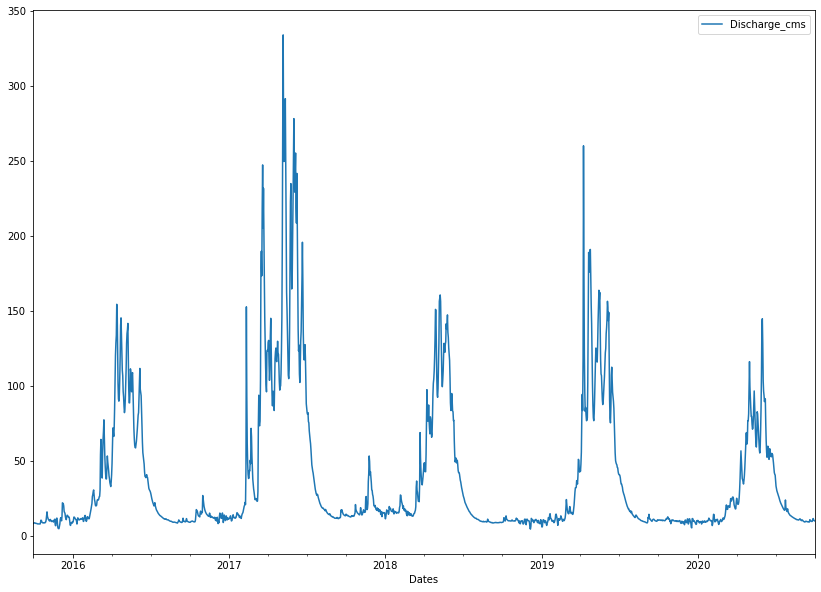

In [9]:
# Plot the discharge
df.plot(x='Dates',y='Discharge_cms',figsize=(14,10))

In [10]:
# Calculate mean for all dates
df['Discharge_cms'].mean()

38.91172702709672

In [11]:
# Calculate standard deviation for all dates
df['Discharge_cms'].std()

47.362512770899095

In [16]:
# Convert Dates to a pandas datetime
df['pd_dates'] = pd.to_datetime(df['Dates'])

# Calculate the means by month to analyze mean seasonal signal
df.index = pd.to_datetime(df['pd_dates'],'%y-%m-%d')
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values
q_seasonal

array([ 12.16061099,  20.72071101,  45.22749036,  93.12070411,
       121.23889091,  87.28703213,  26.35809965,  12.22108336,
        10.6586611 ,  11.61928275,  13.90445646,  12.48909839])

Text(0, 0.5, 'Discharge [m${^3}$/s]')

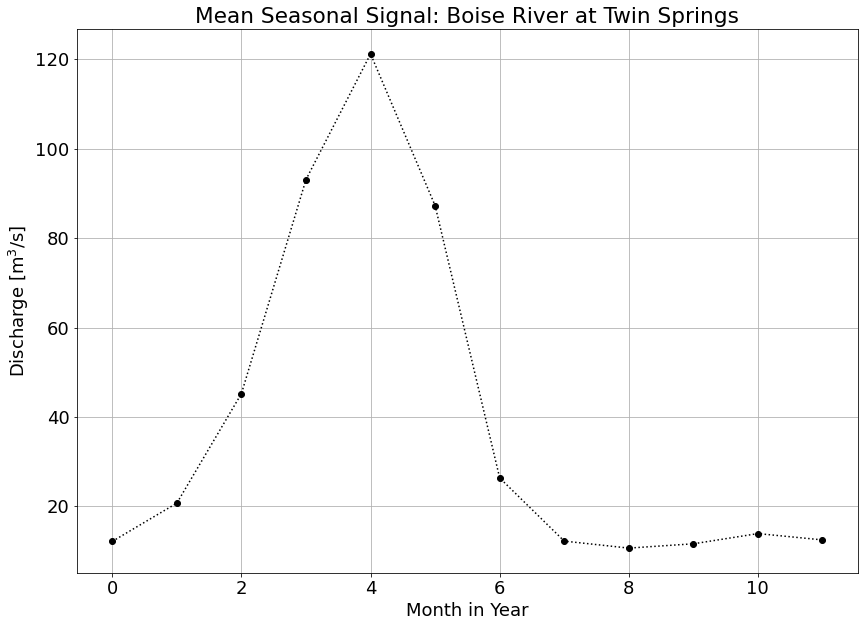

In [23]:
# Plot mean seasonal signal
plt.figure(figsize=(14,10))
plt.plot(q_seasonal,'ko:')
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.grid() # Turn on the major axes gridlines
plt.title('Mean Seasonal Signal: Boise River at Twin Springs')
plt.xlabel('Month in Year') # Label the x-axis
plt.ylabel('Discharge [m${^3}$/s]') # Label the y-axis